In [52]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

import itertools    

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [3]:
df.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.147000e+03,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000,8147.000000
mean,4.022622e+04,6.500307,3.818584,5.574936,6.005155,5.321468,7.708482,5.215908,2.755984,1.496379,47.262182,1.384681
std,6.320721e+05,0.500031,2.008937,2.215745,2.120127,2.166217,1.720839,1.438792,0.901406,0.500018,18.316890,0.486550
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.063000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.749000e+03,7.000000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.778000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,61.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F08D64EC50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F08DE2D198>]], dtype=object)

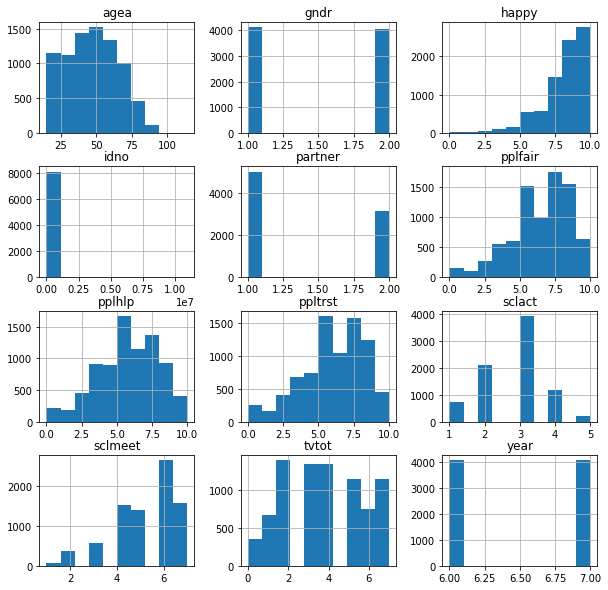

In [4]:
df.hist(figsize=(10,10))

In [11]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance','subsample':1}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


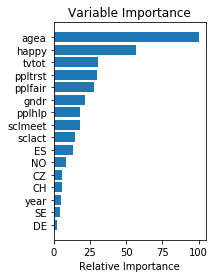

In [6]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [67]:
def run_model(estimators,depth,loss,subsample):
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
    params = {'n_estimators': estimators,
              'max_depth': depth,
              'loss': loss,'subsample':subsample}

    # Initialize and fit the model.
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)

    # Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test,y_test)
    print("Train score: %0.6f" % (train_score))
    print("Test score: %0.6f" % (test_score))
    return train_score,test_score
    
  #Can focus on error type once parameters are narrowed down
  #  print((
  #      'Training set accuracy:\n'
  #      'Percent Type I errors: {}\n'
  #      'Percent Type II errors: {}\n\n'
  #      'Test set accuracy:\n'
  #      'Percent Type I errors: {}\n'
  #      'Percent Type II errors: {}'
  #  ).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

In [10]:
#Run model testing to match material output
run_model(500,2,"deviance",1)

Train score: 0.777414
Test score: 0.752147


In [68]:
estimators_list=range(550,750,50)
max_depth_list = range(3,7)
loss_list = ("deviance","exponential")
subsample_list = (.6,.7,.8,.9)

In [69]:
combination=0
comparison_table=pd.DataFrame(columns=("combination","train_score","test_score"))
for (estimators, depth, loss,subsample) in itertools.product(estimators_list, max_depth_list, loss_list,subsample_list):
    combination=combination+1
    print(combination)    
    print ("Parameters %0.f, %0.f, %0.1f" % (estimators,depth,subsample))
    print(loss)
    run_model(estimators,depth,loss,1)    

1
Parameters 550, 3, 0.6
deviance
Train score: 0.814921
Test score: 0.731288
2
Parameters 550, 3, 0.7
deviance
Train score: 0.814921
Test score: 0.731288
3
Parameters 550, 3, 0.8
deviance
Train score: 0.814921
Test score: 0.731288
4
Parameters 550, 3, 0.9
deviance
Train score: 0.814921
Test score: 0.731288
5
Parameters 550, 3, 0.6
exponential
Train score: 0.809875
Test score: 0.739877
6
Parameters 550, 3, 0.7
exponential
Train score: 0.809875
Test score: 0.739877
7
Parameters 550, 3, 0.8
exponential
Train score: 0.809875
Test score: 0.739877
8
Parameters 550, 3, 0.9
exponential
Train score: 0.809875
Test score: 0.739877
9
Parameters 550, 4, 0.6
deviance
Train score: 0.869340
Test score: 0.731288
10
Parameters 550, 4, 0.7
deviance
Train score: 0.869340
Test score: 0.731288
11
Parameters 550, 4, 0.8
deviance
Train score: 0.869340
Test score: 0.731288
12
Parameters 550, 4, 0.9
deviance
Train score: 0.869340
Test score: 0.731288
13
Parameters 550, 4, 0.6
exponential
Train score: 0.858020
T

Train score: 0.818740
Test score: 0.742331
105
Parameters 700, 4, 0.6
deviance
Train score: 0.885843
Test score: 0.721472
106
Parameters 700, 4, 0.7
deviance
Train score: 0.885843
Test score: 0.722699
107
Parameters 700, 4, 0.8
deviance
Train score: 0.885843
Test score: 0.722699
108
Parameters 700, 4, 0.9
deviance
Train score: 0.885843
Test score: 0.721472
109
Parameters 700, 4, 0.6
exponential
Train score: 0.875477
Test score: 0.727607
110
Parameters 700, 4, 0.7
exponential
Train score: 0.875477
Test score: 0.728834
111
Parameters 700, 4, 0.8
exponential
Train score: 0.875477
Test score: 0.727607
112
Parameters 700, 4, 0.9
exponential
Train score: 0.875477
Test score: 0.728834
113
Parameters 700, 5, 0.6
deviance
Train score: 0.955947
Test score: 0.716564
114
Parameters 700, 5, 0.7
deviance
Train score: 0.955947
Test score: 0.716564
115
Parameters 700, 5, 0.8
deviance
Train score: 0.955947
Test score: 0.717791
116
Parameters 700, 5, 0.9
deviance
Train score: 0.955947
Test score: 0.7177

In [70]:
#Combination 102 Looks good, 3 dept, 700 estimators, .8 subsampling, exponential - .742331 Test, .81874 train scores.

In [ ]:
# See if increasing estimators and depth helps, causes extreme overfitting.
run_model(1000,6,"exponential",.8)  